In [1]:
import os
import csv
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np

In [7]:
folders = [x[0] for x in os.walk('images')][1:]

In [12]:
images = []
for folder in folders:
    with open(folder+'/filelist_LBP.txt', 'r') as f:
        reader = csv.reader(f, delimiter='\t')
        for img_name, left, top, right, bottom, new_size_y, new_size_x in reader:
            img = Image.open(folder+'/'+img_name).resize((int(new_size_y), int(new_size_x))).crop((int(left), int(top), int(right), int(bottom))).resize((100,100))
            
            # some images are black and white, for PCA to work correctly need to convert those to rgb
            if (len(np.array(img).shape) != 3 or np.array(img).shape[2] != 3):
                rgbimg = Image.new("RGB", img.size)
                rgbimg.paste(img)
                images.append(rgbimg)
            else:
                images.append(img)
            if (len(np.array(images[-1]).shape) != 3 or np.array(images[-1]).shape[2] != 3):
                print ("Image was not processed correctly " + folder + '/' + img_name)

Showing few random faces from the dataset.

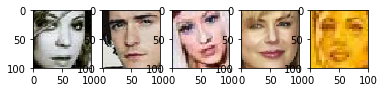

In [13]:
num_faces = 5

for i in range(1, num_faces+1):
    img = random.choice(images)
    plt.subplot(2, num_faces, i)
    plt.imshow(img)

### Implementing eigenfaces with SVD

Implement eigenfaces using singular value decomposition (SVD). Remember to represent the images properly and account for the color.

In [ ]:
# =============== TODO: Your code here ===============
# Represent the images as a matrix for SVD decompotision.


# ====================================================

In [ ]:
# =============== TODO: Your code here ===============
# Implement eigenfaces using singular value decomposition (SVD). 
# Remember to represent the images properly and account for the color.


# ====================================================

Visualize 10 eigenfaces associated with the highest eigenvalues.

In [ ]:
# =============== TODO: Your code here ===============
# Visualize 10 eigenfaces associated with the highest eigenvalues.


# ====================================================

### Implementing eigenfaces with variance maximization

As you have noticed, SVD could be quite slow if the number of faces is large. If the number of faces exceeds 50k, which is not a large dataset according to the modern standards, doing SVD is not possible directly and you have to use iterative methods for computing eigenfaces.

Here, you are going to calculate 10 eigenfaces by maximizing variance as stated in the lecture notes.

In [ ]:
# =============== TODO: Your code here ===============
# Calculate 10 eigenfaces iteratively by variance maximization.


# ====================================================

Visualize 10 eigenfaces learned by variance maximization. Compare them with SVG generated eigenfaces. 

In [ ]:
# =============== TODO: Your code here ===============
# Visualize 10 eigenfaces learned by variance maximization. Compare them with SVG generated eigenfaces.


# ====================================================